In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


x = np.random.rand(100,2)

t_xor = (x[:,0] >= 0.5) ^ (x[:,1] > 0.5)


def sigmoid(x):
    return 1/(1+np.exp(-x))


def step(x):
    return np.where(x>=0,1,0)

def relu(x):
    return np.maximum(0,x)

####### PLOT SIGMOID AND STEP FUNCTION ########
# x= np.linspace(-10,10,100)
# plt.plot(x,sigmoid(x))
# plt.plot(x,step(x))
# plt.show()

In [3]:

######## PLOT XOR #############################
# plt.scatter(x[:,0],x[:,1],c=t_xor)
# plt.show()

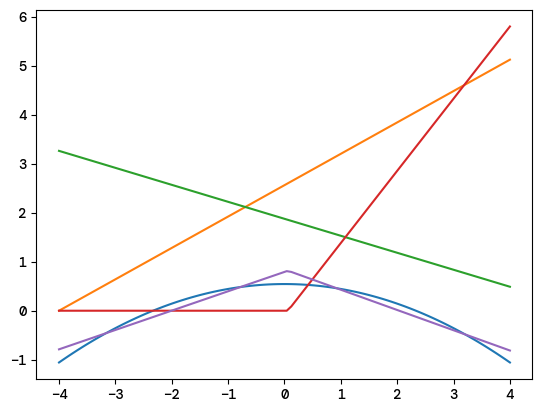

In [4]:


# xor = np.array([[0,0],[0,1],[1,0],[1,1]])
# target = np.array([0,1,1,0])

# x = np.repeat(xor,100,axis=0)
# t_xor = np.repeat(target,100,axis=0).reshape(-1,1)


# poly = PolynomialFeatures(3)
# data = poly.fit_transform(x)

# def fit(x,target):
#     w = np.ones((x.shape[1],1))
#     eta = 0.1
#     for _ in range(1000):
#         z = np.dot(x,w)
#         y = sigmoid(z)
#         e = y - target
#         w -= eta * np.dot(x.T,e)
#     return w



# X = np.linspace(0,1,10)
# Y = np.linspace(0,1,10)
# X,Y = np.meshgrid(X,Y)
# w = fit(data,t_xor.reshape(-1,1))
# g = np.concatenate((X.ravel().reshape(-1,1),Y.ravel().reshape(-1,1)),axis=1)
# g = poly.fit_transform(g)
# Z = np.dot(g,w)
# Z = Z.reshape(10,10)
# Z = sigmoid(Z)
#
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X,Y,Z)
# ax.scatter(xor[:,0],xor[:,1],target, c=target)
# plt.show()




# regresion one hidden layer
# dimension [1,2,1] 
np.random.seed(0)
params = [{'w':np.random.randn(1,3),'b':np.random.randn(1,3)},{'w':np.random.randn(3,1),'b':np.random.randn(1,1)}]

def forward(x,params):
    z1 = np.dot(x,params[0]['w']) + params[0]['b']
    a1 = relu(z1)
    z2 = np.dot(a1,params[1]['w']) + params[1]['b']
    a2 = z2
    return a2




# tune manually
# params[0]['w'] = np.array([[-0.5],[1],[1]]).reshape(1,3)
# params[0]['b'] = np.array([[-1.0],[0.],[-2.]]).reshape(1,3)
# params[1]['w'] = np.array([[-6.],[-2.],[0.5]]).reshape(3,1)
# params[1]['b'] = np.array([[1.]]).reshape(1,1)


# mean square error
def mse(y,t):
    return np.mean((y-t)**2)

def relu_derivative(x):
    return np.where(x>=0,1,0)

def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

def fit(x,target,params):
    N = x.shape[0]
    eta = 0.04
    t = target
    for _ in range(10000):
        W1 = params[0]['w'] 
        b1 = params[0]['b']
        W2 = params[1]['w']
        b2 = params[1]['b']

        if not np.isfinite(W1).all() or not np.isfinite(W2).all():
            # clip weights
            W1 = np.clip(W1, -100, 100)
            W2 = np.clip(W2, -100, 100)
            print('weights clipped')

        if not np.isfinite(b1).all() or not np.isfinite(b2).all():
            # clip biases
            b1 = np.clip(b1, -100, 100)
            b2 = np.clip(b2, -100, 100)
            print('biases clipped')


        Z1 = x.dot(W1) + b1
        H = relu(Z1)
        # H = sigmoid(Z1)
        Y = H.dot(W2) + b2
# Compute output error
        error = Y - t
# Backward pass (compute gradients)
        grad_W2 = H.T.dot(error) / N
        grad_b2 = np.sum(error, axis=0, keepdims=True) / N
        grad_H = error.dot(W2.T)
        # grad_Z1 = grad_H * sigmoid_derivative(Z1)
        grad_Z1 = grad_H * relu_derivative(Z1)
        grad_W1 = x.T.dot(grad_Z1) / N
        grad_b1 = np.sum(grad_Z1, axis=0, keepdims=True) / N

        params[0]['w'] -= eta * grad_W1
        params[0]['b'] -= eta * grad_b1
        params[1]['w'] -= eta * grad_W2
        params[1]['b'] -= eta * grad_b2
    return params


x = np.linspace(-4,4,100)
t = -0.1*x**2
t = t - np.mean(t)
plt.plot(x,t)



params = fit(x.reshape(-1,1),t.reshape(-1,1),params)



# plot first layer activation
z1 = np.dot(x.reshape(-1,1),params[0]['w']) + params[0]['b']
a1 = relu(z1)
plt.plot(x,a1)


y = forward(x.reshape(-1,1),params)
plt.plot(x,y)
plt.show()

